### Data Preparation Project. 
Scenario:   
You have been retained by a haulage company to analyse a dataset based on data collected from heavy Scania trucks in everyday usage. The system in focus is the Air Pressure system (APS) which generates pressurised air that are utilized in various functions in a truck, such as braking and gear changes. The dataset’s  positive class consists of component failures for a specific component of the APS system.  The negative class consists of trucks with failures for components not related to the APS. The data consists  of a subset of all available data, selected by experts. This analysis will help determine the investment strategy for the company in the upcoming year.   



In [18]:
%matplotlib inline

In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns; 
import warnings 
warnings.filterwarnings('ignore') 
sns.set() 

In [20]:
aps_failure = pd.read_csv("aps_failure_set.csv")
aps_failure.head()

,class,aa_000,ab_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,...,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000
0,neg,76698,na,2130706438,280,0,0,0,0,0,...,1240520,493384,721044,469792,339156,157956,73224,0,0,0
1,neg,33058,na,0,na,0,0,0,0,0,...,421400,178064,293306,245416,133654,81140,97576,1500,0,0
2,neg,41040,na,228,100,0,0,0,0,0,...,277378,159812,423992,409564,320746,158022,95128,514,0,0
3,neg,12,0,70,66,0,10,0,0,0,...,240,46,58,44,10,0,0,0,4,32
4,neg,60874,na,1368,458,0,0,0,0,0,...,622012,229790,405298,347188,286954,311560,433954,1218,0,0


In [21]:
aps_failure.isnull().sum()

class     0
aa_000    0
ab_000    0
ac_000    0
ad_000    0
         ..
ee_007    0
ee_008    0
ee_009    0
ef_000    0
eg_000    0
Length: 171, dtype: int64

### STEP 1 
Using .head to see the first five observations we realized that there are missing values. 
However, these missing values are not NaN or empty, it is fill with na, we need to change it, instance to be able to continue our process. 

In [22]:
aps_failure.shape

(60000, 171)

To be able to see how much data we are working with, I used .shape and as we can see it there are 60.000 observations and 171 features. 

In [23]:
aps_failure.describe()

,aa_000
count,6.000000e+04
mean,5.933650e+04
std,1.454301e+05
min,0.000000e+00
25%,8.340000e+02
50%,3.077600e+04
75%,4.866800e+04
max,2.746564e+06


In [24]:
aps_failure.dtypes

class     object
aa_000     int64
ab_000    object
ac_000    object
ad_000    object
           ...  
ee_007    object
ee_008    object
ee_009    object
ef_000    object
eg_000    object
Length: 171, dtype: object

In [25]:
aps_failure.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60000 entries, 0 to 59999
Columns: 171 entries, class to eg_000
dtypes: int64(1), object(170)
memory usage: 78.3+ MB


Upon we can see that the Data types are int64 and Object.
However, I need numeric. 


### ADD OBSERVATION HERE ABOUT CLEAN DATA. 

In [26]:
aps_failure.head()

,class,aa_000,ab_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,...,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000
0,neg,76698,na,2130706438,280,0,0,0,0,0,...,1240520,493384,721044,469792,339156,157956,73224,0,0,0
1,neg,33058,na,0,na,0,0,0,0,0,...,421400,178064,293306,245416,133654,81140,97576,1500,0,0
2,neg,41040,na,228,100,0,0,0,0,0,...,277378,159812,423992,409564,320746,158022,95128,514,0,0
3,neg,12,0,70,66,0,10,0,0,0,...,240,46,58,44,10,0,0,0,4,32
4,neg,60874,na,1368,458,0,0,0,0,0,...,622012,229790,405298,347188,286954,311560,433954,1218,0,0


### Fist of all to clean the data we are using the code upon to calc the mean and the line above we are replacing 'na' to Mean. 

I am going to replace any 'na' value to NaN and then I'll drop all the columns with missing values. 

In [53]:
aps_failure_new = aps_failure.replace('na',np.nan)


In [54]:
aps_failure_new

,class,aa_000,ab_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,...,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000
0,neg,76698,NaN,2130706438,280,0,0,0,0,0,...,1240520,493384,721044,469792,339156,157956,73224,0,0,0
1,neg,33058,NaN,0,NaN,0,0,0,0,0,...,421400,178064,293306,245416,133654,81140,97576,1500,0,0
2,neg,41040,NaN,228,100,0,0,0,0,0,...,277378,159812,423992,409564,320746,158022,95128,514,0,0
3,neg,12,0,70,66,0,10,0,0,0,...,240,46,58,44,10,0,0,0,4,32
4,neg,60874,NaN,1368,458,0,0,0,0,0,...,622012,229790,405298,347188,286954,311560,433954,1218,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59995,neg,153002,NaN,664,186,0,0,0,0,0,...,998500,566884,1290398,1218244,1019768,717762,898642,28588,0,0
59996,neg,2286,NaN,2130706538,224,0,0,0,0,0,...,10578,6760,21126,68424,136,0,0,0,0,0
59997,neg,112,0,2130706432,18,0,0,0,0,0,...,792,386,452,144,146,2622,0,0,0,0
59998,neg,80292,NaN,2130706432,494,0,0,0,0,0,...,699352,222654,347378,225724,194440,165070,802280,388422,0,0


I've changed all the columns with values 'na' to 'NaN', Now, I can continue the process to drop all the observations with 

In [55]:
aps_failure_new.dtypes

class     object
aa_000     int64
ab_000    object
ac_000    object
ad_000    object
           ...  
ee_007    object
ee_008    object
ee_009    object
ef_000    object
eg_000    object
Length: 171, dtype: object

In [56]:
aps_failure_new.isnull().sum()

class         0
aa_000        0
ab_000    46329
ac_000     3335
ad_000    14861
          ...  
ee_007      671
ee_008      671
ee_009      671
ef_000     2724
eg_000     2723
Length: 171, dtype: int64

In [57]:
!pip install missingno

In [58]:
import missingno as msno 

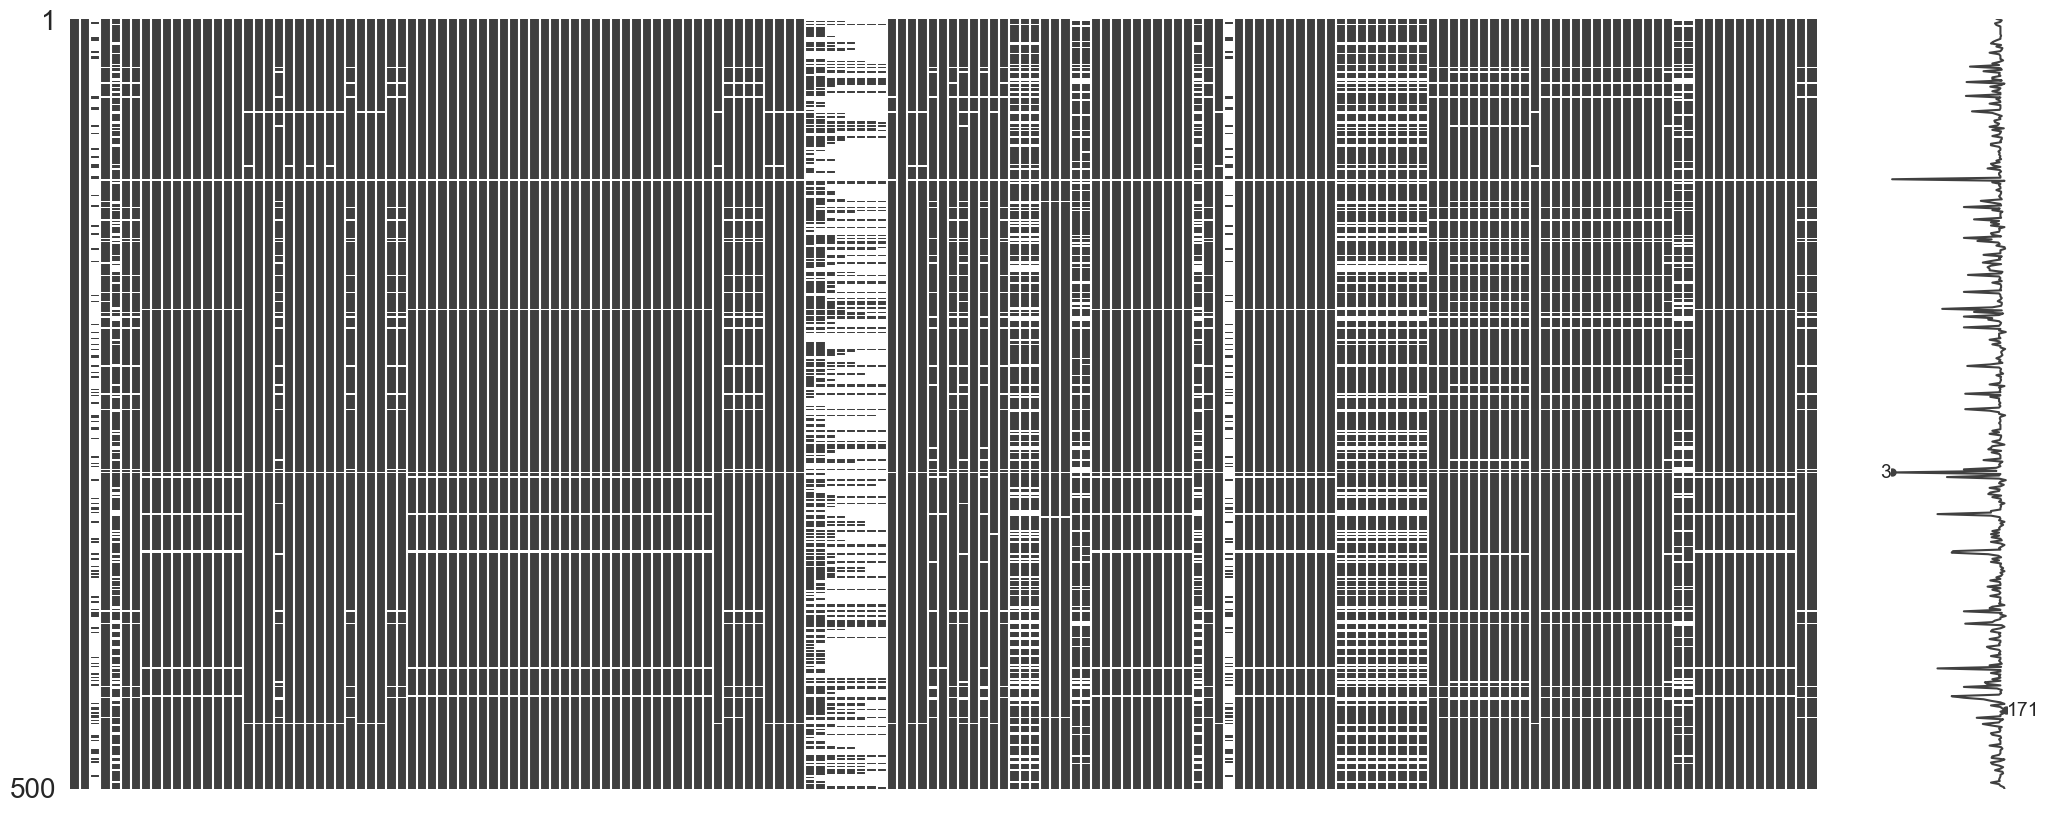

In [59]:
ax =msno.matrix(aps_failure_new.sample(500))

In [60]:
# As we can see it above, there are too much missing values, in order to work with this dataset we need to use Imputer to fill
# all the missing values. 

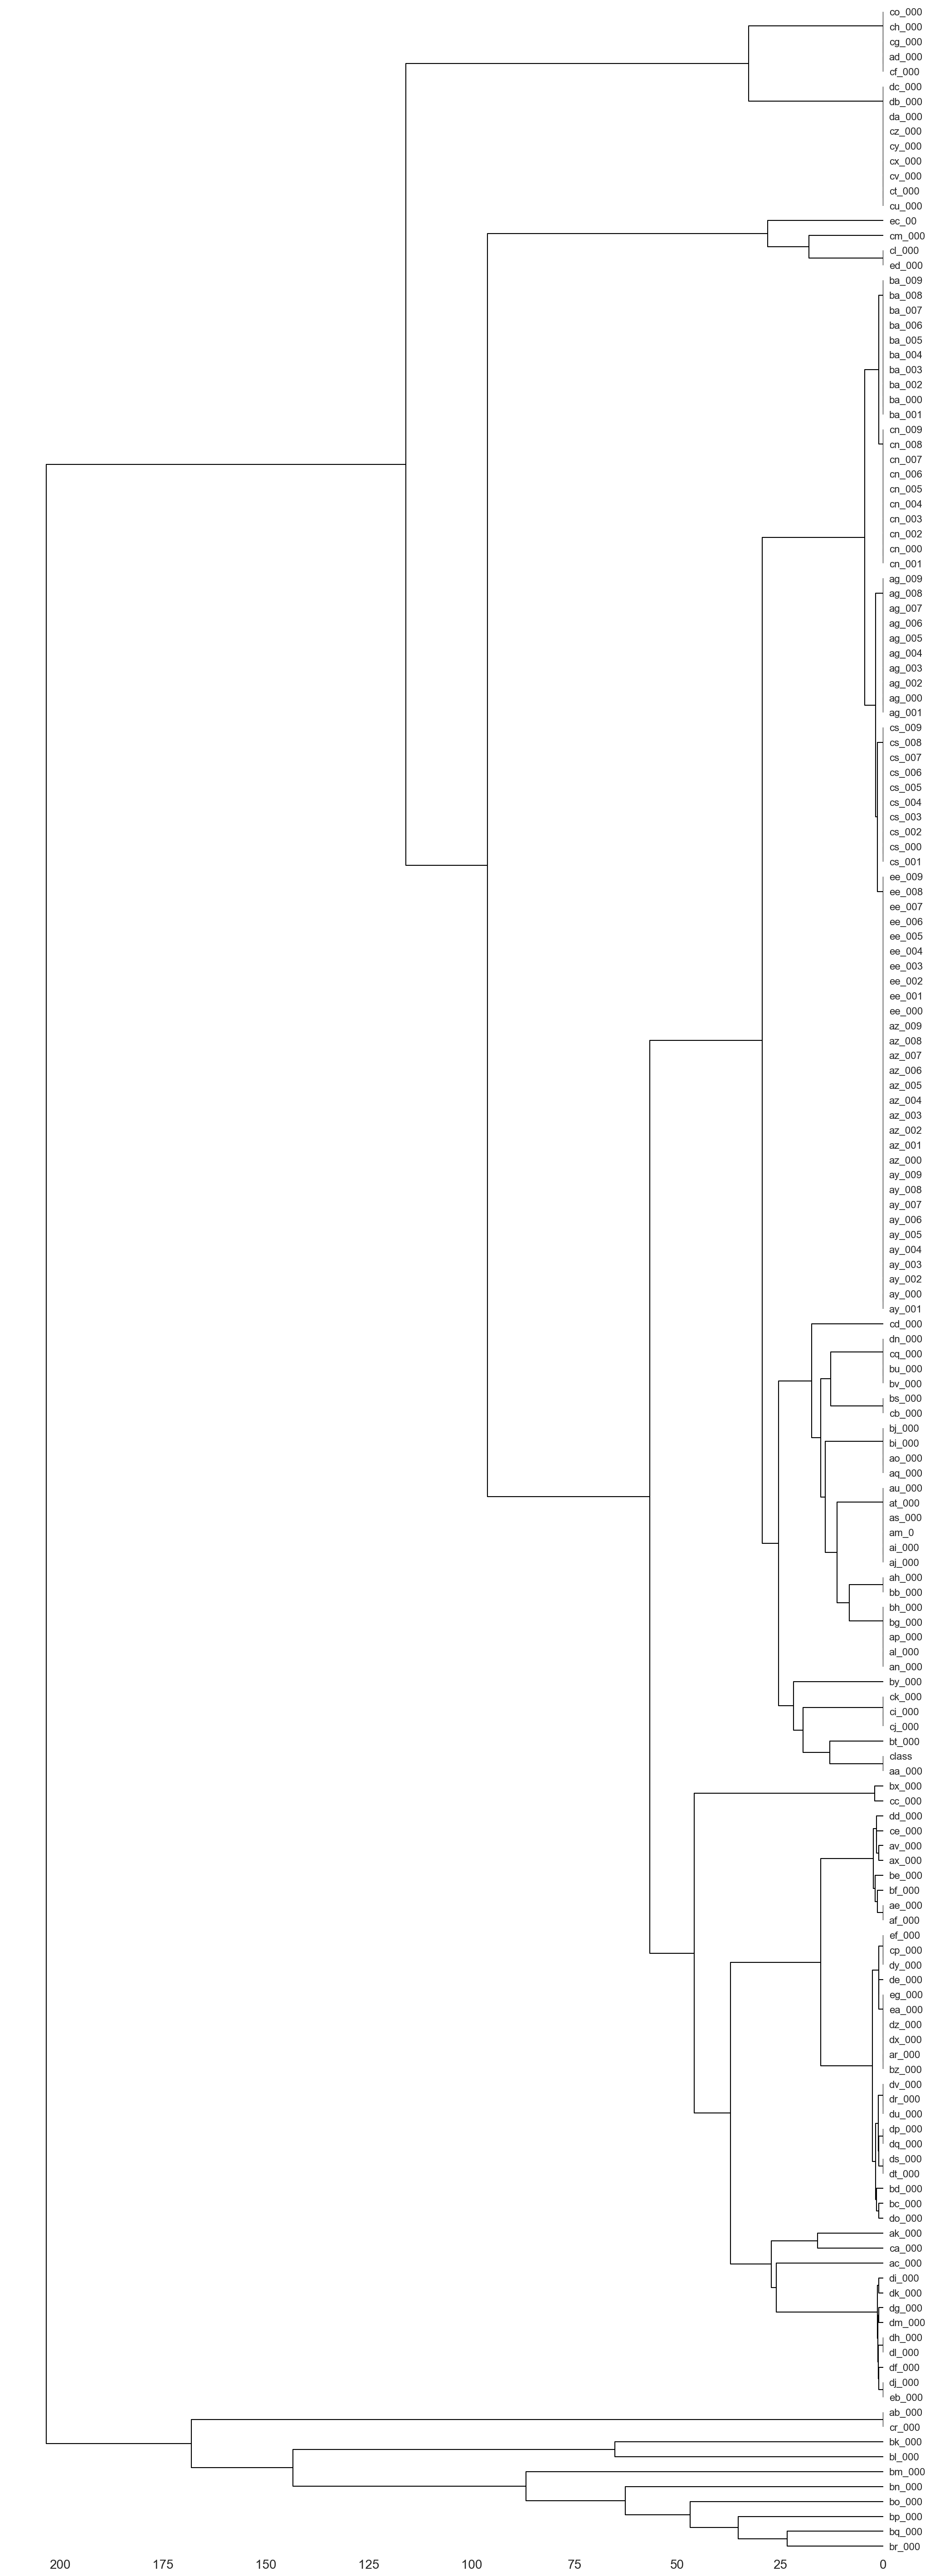

In [61]:
ax = msno.dendrogram(aps_failure_new)

In [48]:
aps_failure_new.isnull().sum()

class         0
aa_000        0
ab_000    46329
ac_000     3335
ad_000    14861
          ...  
ee_007      671
ee_008      671
ee_009      671
ef_000     2724
eg_000     2723
Length: 171, dtype: int64

In [50]:
aps_failure_new.shape

(60000, 171)

In [64]:
aps_failure_new.head()

,class,aa_000,ab_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,...,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000
0,neg,76698,NaN,2130706438,280,0,0,0,0,0,...,1240520,493384,721044,469792,339156,157956,73224,0,0,0
1,neg,33058,NaN,0,NaN,0,0,0,0,0,...,421400,178064,293306,245416,133654,81140,97576,1500,0,0
2,neg,41040,NaN,228,100,0,0,0,0,0,...,277378,159812,423992,409564,320746,158022,95128,514,0,0
3,neg,12,0,70,66,0,10,0,0,0,...,240,46,58,44,10,0,0,0,4,32
4,neg,60874,NaN,1368,458,0,0,0,0,0,...,622012,229790,405298,347188,286954,311560,433954,1218,0,0


In [65]:
aps_failure_new['class'].replace(['pos','neg'],[1,2],inplace=True)

In [66]:
aps_failure_new.head()

,class,aa_000,ab_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,...,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000
0,2,76698,NaN,2130706438,280,0,0,0,0,0,...,1240520,493384,721044,469792,339156,157956,73224,0,0,0
1,2,33058,NaN,0,NaN,0,0,0,0,0,...,421400,178064,293306,245416,133654,81140,97576,1500,0,0
2,2,41040,NaN,228,100,0,0,0,0,0,...,277378,159812,423992,409564,320746,158022,95128,514,0,0
3,2,12,0,70,66,0,10,0,0,0,...,240,46,58,44,10,0,0,0,4,32
4,2,60874,NaN,1368,458,0,0,0,0,0,...,622012,229790,405298,347188,286954,311560,433954,1218,0,0


### STEP 2
We've already clean the data the decision that I made was. 
1. I've dropped all the columns with NaN, before that I changed 'na' values to NaN to be able to continue the process of data cleaning. 
2. I changed the colum class which there were two strings "pos' and 'neg' I replace to 1 = pos and 2 = neg. 

<Axes: ylabel='class'>

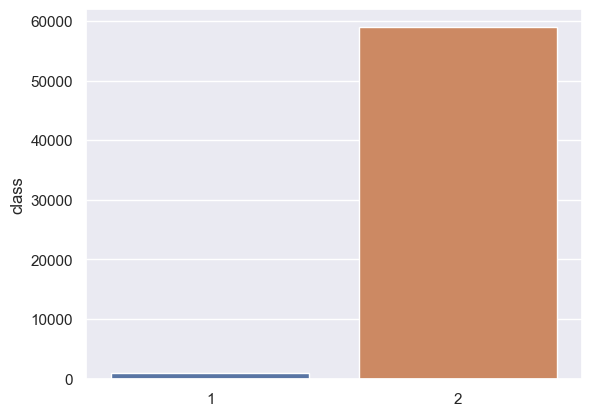

In [67]:
sns.barplot(data=aps_failure_new,x=aps_failure_new['class'].unique(),y=aps_failure_new['class'].value_counts())

In [69]:
X = aps_failure_new.drop(columns='class')
y = aps_failure_new['class']

In [75]:
from sklearn.model_selection import train_test_split
from imblearn.under_sampling import ClusterCentroids 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)


In [76]:
from sklearn.experimental import enable_iterative_imputer 
from sklearn import impute 

In [77]:
imputer = impute.IterativeImputer()

In [78]:
col = aps_failure_new()
imputed = imputer.fit_transform(X_train[])

NameError: name 'cols' is not defined

In [74]:
#Undersampler. 

undersampler = ClusterCentroids()
y_train.value_counts()

2    39532
1      668
Name: class, dtype: int64

In [72]:
X_smote, y_smote = undersampler.fit_resample(X_train, y_train)

ValueError: Input X contains NaN.
ClusterCentroids does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values

In [296]:
y_smote.value_counts()

1    51
2    51
Name: class, dtype: int64

In [297]:
resampled_data = pd.DataFrame({'class': y_smote})

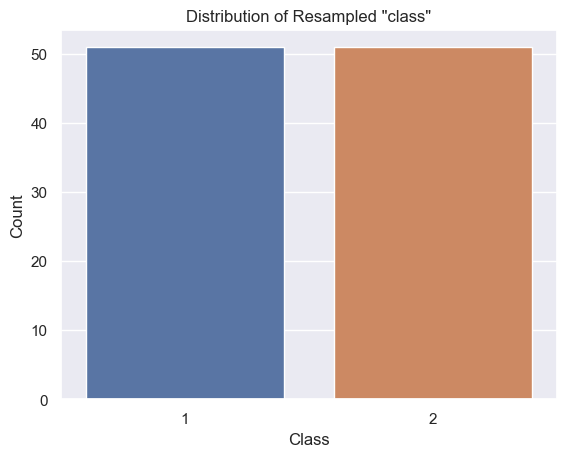

In [298]:
sns.countplot(data=resampled_data, x='class')
plt.xlabel('Class')
plt.ylabel('Count')
plt.title('Distribution of Resampled "class"')
plt.show()

In [299]:
y_smote.head()

0    1
1    1
2    1
3    1
4    1
Name: class, dtype: int64

In [300]:
X.head()

,aa_000,ab_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,ag_003,...,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000
16,31300,0,784,740,0,0,0,0,0,20386,...,798872,112724,51736,7054,6628,27600,2,2,0,0
179,97000,0,378,160,0,0,0,0,0,84938,...,1078982,313334,511330,552328,871528,871104,1980,42,0,0
225,124656,2,278,170,0,0,0,0,0,194792,...,1205696,866148,697610,700400,1900386,437532,3680,0,0,0
394,281324,2,3762,2346,0,0,4808,215720,967572,2037438,...,624606,269976,638838,1358354,819918,262804,2824,0,0,0
413,43482,0,1534,1388,0,0,0,0,40024,493856,...,497196,121166,202272,232636,645690,50,0,0,0,0


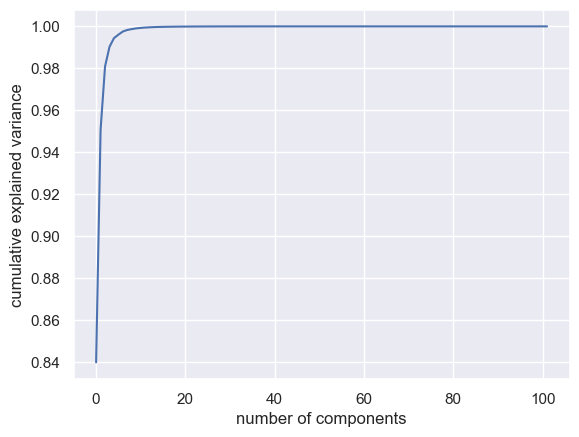

In [301]:
pca = PCA().fit(X_smote) 
plt.plot(np.cumsum(pca.explained_variance_ratio_)) 
plt.xlabel('number of components') 
plt.ylabel('cumulative explained variance'); 

In [312]:
pca = PCA(2)
projected = pca.fit_transform(X_smote)

In [313]:
projected.shape

(102, 2)

In [314]:
X_smote = pd.DataFrame(projected, columns =['A1', 'A2'])

In [315]:
X_smote

,A1,A2
0,-1.217697e+08,-1.003843e+08
1,-1.231914e+08,-4.264287e+07
2,-1.210812e+08,-1.117761e+08
3,-1.238641e+08,-5.651256e+07
4,-1.211546e+08,-1.053889e+08
...,...,...
97,-1.251660e+08,7.014949e+07
98,-1.270112e+08,6.687232e+07
99,2.008365e+09,-3.707441e+07
100,-1.227781e+08,-1.034842e+08


In [308]:
y_smote.head()

0    1
1    1
2    1
3    1
4    1
Name: class, dtype: int64

In [318]:
X_smote['class'] = y_smote

In [319]:
X_smote.head()

,A1,A2,class
0,-1.217697e+08,-1.003843e+08,1
1,-1.231914e+08,-4.264287e+07,1
2,-1.210812e+08,-1.117761e+08,1
3,-1.238641e+08,-5.651256e+07,1
4,-1.211546e+08,-1.053889e+08,1


In [320]:
X_smote_array = X_smote.values

In [322]:
from sklearn.model_selection import train_test_split
X = X_smote_array[:,0:2]
y = X_smote_array[:,2]
X_train, X_validation, Y_train, Y_validation = train_test_split(X, y, test_size=0.20, random_state=1)

In [323]:
from matplotlib import pyplot
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC

In [324]:
models = []
models.append(('LR', LogisticRegression(solver='liblinear', multi_class='ovr')))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC(gamma='auto')))

In [325]:
results = []
names = []
for name, model in models:
    kfold = StratifiedKFold(n_splits=10, random_state=1, shuffle=True)
    cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring='accuracy')
    results.append(cv_results)
    names.append(name)
    print('%s: %f (%f)' % (name, cv_results.mean(), cv_results.std()))

LR: 0.605556 (0.069222)
LDA: 0.605556 (0.069222)
KNN: 0.619444 (0.131498)
CART: 0.544444 (0.104083)
NB: 0.580556 (0.056519)
SVM: 0.555556 (0.058926)


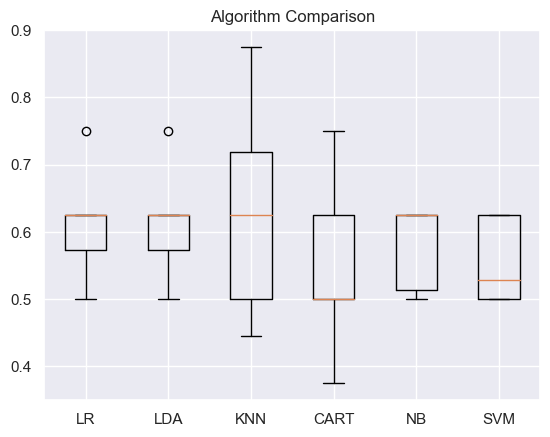

In [326]:
pyplot.boxplot(results, labels=names)
pyplot.title('Algorithm Comparison')
pyplot.show()